In [1]:
#remove outlyers

In [41]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [42]:
df = pd.read_csv("anime_songs.csv")
df.sample(5)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
46,0,0.398,0.80300,7,-3.224,1,0.0594,0.0255,0.000,0.0591,0.5190,168.978,audio_features,47Old3TEOc2v4eOOv5pA6H,spotify:track:47Old3TEOc2v4eOOv5pA6H,https://api.spotify.com/v1/tracks/47Old3TEOc2v...,https://api.spotify.com/v1/audio-analysis/47Ol...,259600,4,嘘じゃない
398,0,0.240,0.00772,10,-28.248,1,0.0452,0.9740,0.930,0.0756,0.0364,75.027,audio_features,73fSc5LqSBGYvMznxAsWdL,spotify:track:73fSc5LqSBGYvMznxAsWdL,https://api.spotify.com/v1/tracks/73fSc5LqSBGY...,https://api.spotify.com/v1/audio-analysis/73fS...,188272,4,Revelation
239,0,0.651,0.05910,7,-19.419,1,0.1400,0.9940,0.947,0.1350,0.3110,123.253,audio_features,3pcqSlIenB67a0kxcznaPI,spotify:track:3pcqSlIenB67a0kxcznaPI,https://api.spotify.com/v1/tracks/3pcqSlIenB67...,https://api.spotify.com/v1/audio-analysis/3pcq...,77587,4,tender moment
290,0,0.255,0.00181,2,-28.885,0,0.0470,0.9910,0.849,0.1240,0.0927,168.153,audio_features,1A1Nua1UdL7N5VZczjozgB,spotify:track:1A1Nua1UdL7N5VZczjozgB,https://api.spotify.com/v1/tracks/1A1Nua1UdL7N...,https://api.spotify.com/v1/audio-analysis/1A1N...,63947,5,Rin's Melody
24,0,0.598,0.61100,11,-5.116,1,0.0227,0.2310,0.000,0.1520,0.4520,82.980,audio_features,3ZYKbGJ6I5adT5ozf0N6OH,spotify:track:3ZYKbGJ6I5adT5ozf0N6OH,https://api.spotify.com/v1/tracks/3ZYKbGJ6I5ad...,https://api.spotify.com/v1/audio-analysis/3ZYK...,255633,3,Lucky Ending


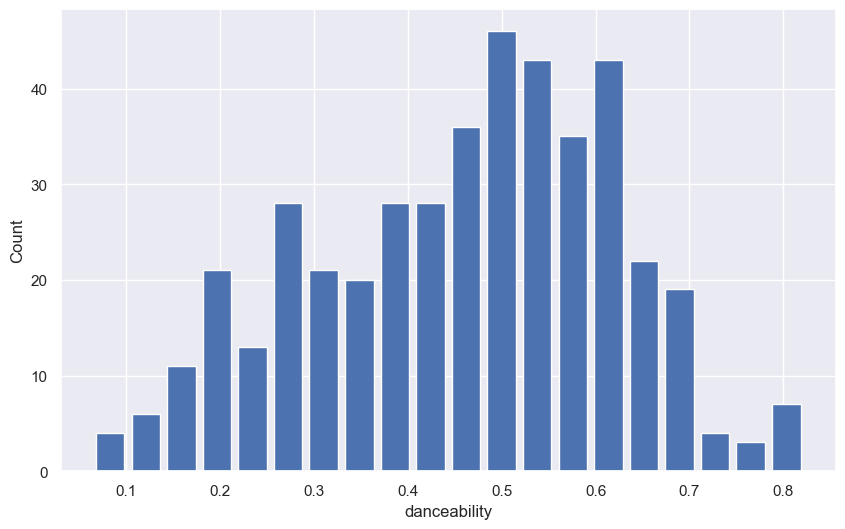

In [43]:
plt.hist(df.danceability, bins=20, rwidth=0.8)
plt.xlabel('danceability')
plt.ylabel('Count')
plt.show()

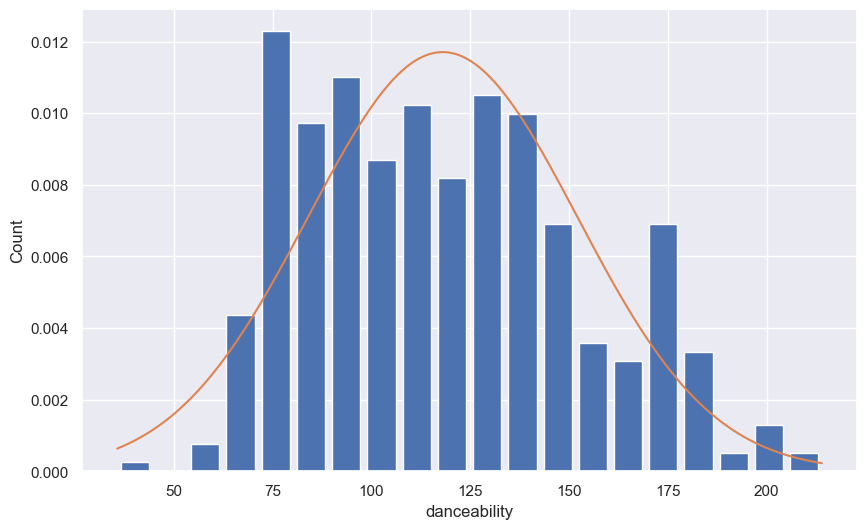

In [44]:
from scipy.stats import norm
import numpy as np
plt.hist(df.tempo, bins=20, rwidth=0.8, density=True)
plt.xlabel('danceability')
plt.ylabel('Count')

rng = np.arange(df.tempo.min(), df.tempo.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.tempo.mean(),df.tempo.std()))

In [45]:
df.danceability.mean()

0.4597687214611872

In [46]:
df.danceability.std()

0.1607048364012583

In [47]:
upper_limit = df.danceability.mean() + 3*df.danceability.std()
upper_limit

0.941883230664962

In [48]:
lower_limit = df.danceability.mean() -3*df.danceability.std()
lower_limit

-0.022345787742587664

In [49]:
df[(df.danceability>upper_limit) | (df.danceability<lower_limit)]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name


In [50]:
df_no_outlier_std_dev = df[(df.danceability<upper_limit) & (df.danceability>lower_limit)]
df_no_outlier_std_dev.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0,0.627,0.824,1,-3.419,1,0.1180,0.06990,0.000066,0.3100,0.774,169.935,audio_features,06XQvnJb53SUYmlWIhUXUi,spotify:track:06XQvnJb53SUYmlWIhUXUi,https://api.spotify.com/v1/tracks/06XQvnJb53SU...,https://api.spotify.com/v1/audio-analysis/06XQ...,206000,4,怪物
1,0,0.585,0.910,5,-3.703,0,0.0917,0.01380,0.000000,0.1900,0.602,92.591,audio_features,5MVjxslIF7mVtYo75Nk445,spotify:track:5MVjxslIF7mVtYo75Nk445,https://api.spotify.com/v1/tracks/5MVjxslIF7mV...,https://api.spotify.com/v1/audio-analysis/5MVj...,221426,4,廻廻奇譚
2,0,0.561,0.667,8,-8.519,0,0.0652,0.05390,0.000000,0.0797,0.383,100.047,audio_features,3CYfCp9XAHc69wtCKTwMaj,spotify:track:3CYfCp9XAHc69wtCKTwMaj,https://api.spotify.com/v1/tracks/3CYfCp9XAHc6...,https://api.spotify.com/v1/audio-analysis/3CYf...,217807,4,0 (zero)
3,0,0.544,0.979,4,-2.800,0,0.1530,0.00336,0.000116,0.0775,0.310,135.001,audio_features,1hFsEbHxsfflhLEPCq5tzk,spotify:track:1hFsEbHxsfflhLEPCq5tzk,https://api.spotify.com/v1/tracks/1hFsEbHxsffl...,https://api.spotify.com/v1/audio-analysis/1hFs...,238587,4,紅蓮華
4,0,0.305,0.252,4,-13.541,0,0.0419,0.39500,0.012700,0.1710,0.127,128.015,audio_features,5dy1QO156l2ct1MVPzc8px,spotify:track:5dy1QO156l2ct1MVPzc8px,https://api.spotify.com/v1/tracks/5dy1QO156l2c...,https://api.spotify.com/v1/audio-analysis/5dy1...,238412,4,歌よ


In [51]:
df_no_outlier_std_dev.shape

(438, 20)

In [52]:
df.shape

(438, 20)

In [53]:
#reading and uploading files
import pandas as pd
songs=pd.read_csv("anime_songs.csv")

In [54]:
df.shape

(438, 20)

In [55]:
songs.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0,0.627,0.824,1,-3.419,1,0.1180,0.06990,0.000066,0.3100,0.774,169.935,audio_features,06XQvnJb53SUYmlWIhUXUi,spotify:track:06XQvnJb53SUYmlWIhUXUi,https://api.spotify.com/v1/tracks/06XQvnJb53SU...,https://api.spotify.com/v1/audio-analysis/06XQ...,206000,4,怪物
1,0,0.585,0.910,5,-3.703,0,0.0917,0.01380,0.000000,0.1900,0.602,92.591,audio_features,5MVjxslIF7mVtYo75Nk445,spotify:track:5MVjxslIF7mVtYo75Nk445,https://api.spotify.com/v1/tracks/5MVjxslIF7mV...,https://api.spotify.com/v1/audio-analysis/5MVj...,221426,4,廻廻奇譚
2,0,0.561,0.667,8,-8.519,0,0.0652,0.05390,0.000000,0.0797,0.383,100.047,audio_features,3CYfCp9XAHc69wtCKTwMaj,spotify:track:3CYfCp9XAHc69wtCKTwMaj,https://api.spotify.com/v1/tracks/3CYfCp9XAHc6...,https://api.spotify.com/v1/audio-analysis/3CYf...,217807,4,0 (zero)
3,0,0.544,0.979,4,-2.800,0,0.1530,0.00336,0.000116,0.0775,0.310,135.001,audio_features,1hFsEbHxsfflhLEPCq5tzk,spotify:track:1hFsEbHxsfflhLEPCq5tzk,https://api.spotify.com/v1/tracks/1hFsEbHxsffl...,https://api.spotify.com/v1/audio-analysis/1hFs...,238587,4,紅蓮華
4,0,0.305,0.252,4,-13.541,0,0.0419,0.39500,0.012700,0.1710,0.127,128.015,audio_features,5dy1QO156l2ct1MVPzc8px,spotify:track:5dy1QO156l2ct1MVPzc8px,https://api.spotify.com/v1/tracks/5dy1QO156l2c...,https://api.spotify.com/v1/audio-analysis/5dy1...,238412,4,歌よ


In [56]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        438 non-null    int64  
 1   danceability      438 non-null    float64
 2   energy            438 non-null    float64
 3   key               438 non-null    int64  
 4   loudness          438 non-null    float64
 5   mode              438 non-null    int64  
 6   speechiness       438 non-null    float64
 7   acousticness      438 non-null    float64
 8   instrumentalness  438 non-null    float64
 9   liveness          438 non-null    float64
 10  valence           438 non-null    float64
 11  tempo             438 non-null    float64
 12  type              438 non-null    object 
 13  id                438 non-null    object 
 14  uri               438 non-null    object 
 15  track_href        438 non-null    object 
 16  analysis_url      438 non-null    object 
 1

In [57]:
# Assuming 'songs' is your DataFrame containing the song features
# List of columns to be dropped
columns_to_drop = ['type', 'id', 'uri', 'duration_ms', 'time_signature','analysis_url']

# Drop the columns
songs = songs.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(songs.head())


   Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0           0         0.627   0.824    1    -3.419     1       0.1180   
1           0         0.585   0.910    5    -3.703     0       0.0917   
2           0         0.561   0.667    8    -8.519     0       0.0652   
3           0         0.544   0.979    4    -2.800     0       0.1530   
4           0         0.305   0.252    4   -13.541     0       0.0419   

   acousticness  instrumentalness  liveness  valence    tempo  \
0       0.06990          0.000066    0.3100    0.774  169.935   
1       0.01380          0.000000    0.1900    0.602   92.591   
2       0.05390          0.000000    0.0797    0.383  100.047   
3       0.00336          0.000116    0.0775    0.310  135.001   
4       0.39500          0.012700    0.1710    0.127  128.015   

                                          track_href      name  
0  https://api.spotify.com/v1/tracks/06XQvnJb53SU...        怪物  
1  https://api.spotify.com/v1/tracks/5MV

In [58]:
songs.describe(include="all").round(2)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,name
count,438.0,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438,438
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438,420
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/tracks/06XQvnJb53SU...,紅蓮華
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
mean,0.0,0.46,0.46,5.20,-11.93,0.63,0.05,0.52,0.38,0.16,0.33,118.04,NaN,NaN
std,0.0,0.16,0.34,3.44,7.99,0.48,0.03,0.41,0.43,0.10,0.22,34.08,NaN,NaN
min,0.0,0.06,0.00,0.00,-37.54,0.00,0.02,0.00,0.00,0.02,0.03,35.66,NaN,NaN
25%,0.0,0.34,0.11,2.00,-18.97,0.00,0.03,0.06,0.00,0.09,0.13,89.96,NaN,NaN
50%,0.0,0.48,0.43,5.00,-9.49,1.00,0.04,0.51,0.02,0.12,0.31,114.88,NaN,NaN
75%,0.0,0.58,0.78,8.00,-4.61,1.00,0.06,0.97,0.88,0.19,0.51,140.12,NaN,NaN


In [59]:
# Drop non-numeric columns if any
numeric_features = songs.select_dtypes(include=['float64', 'int64'])

#standard deviation for each feature
std_dev = numeric_features.std()

# Sort features by standard deviation in descending order
sorted_features = std_dev.sort_values(ascending=False)

# Extract top three features with the highest standard deviation
top_three_features = sorted_features.head(3)

#finding top three features
top_three_feature_names = top_three_features.index.tolist()

# Generate combinations of top three features
from itertools import combinations
feature_combinations = list(combinations(top_three_feature_names, 2))

print("Best three pairs of features with highest standard deviation:")
for pair in feature_combinations:
    print(pair)


Best three pairs of features with highest standard deviation:
('tempo', 'loudness')
('tempo', 'key')
('loudness', 'key')


In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

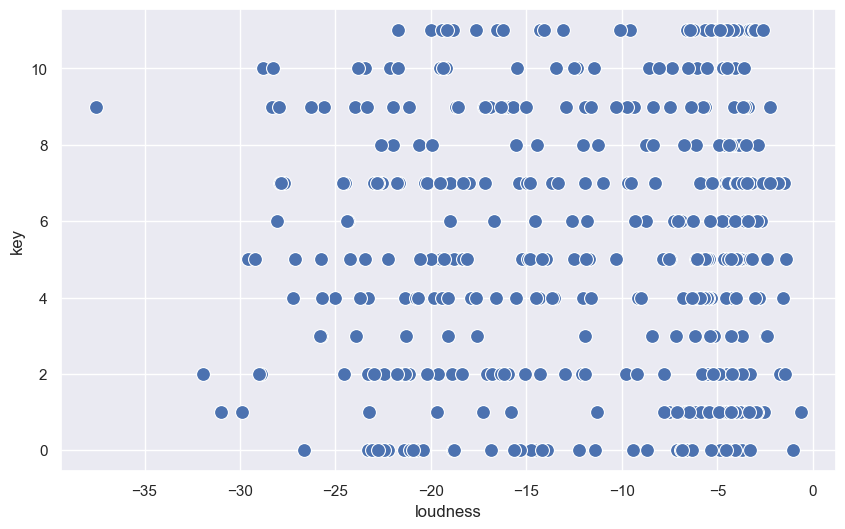

In [61]:
ax=sns.scatterplot(data=songs,
              x= 'loudness',
              y= 'key',
              s=100)

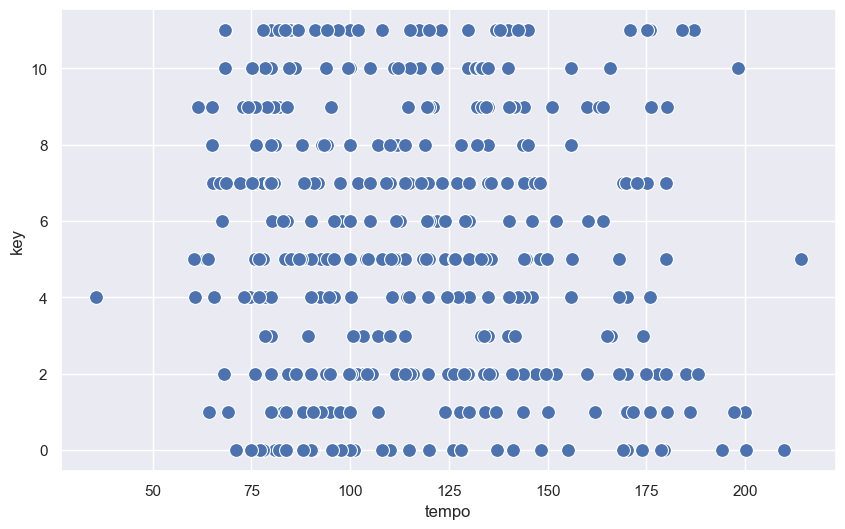

In [62]:
ax=sns.scatterplot(data=songs,
              x= 'tempo',
              y= 'key',
              s=100)

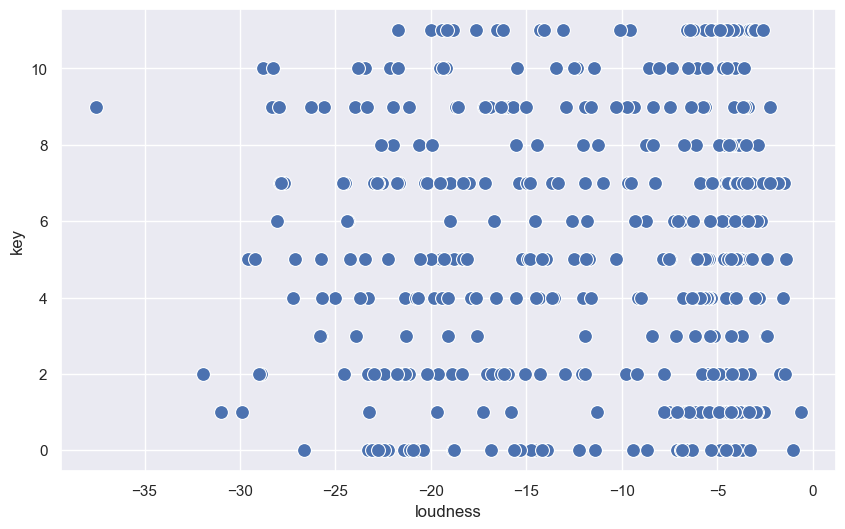

In [63]:
ax=sns.scatterplot(data=songs,
              x= 'loudness',
              y= 'key',
              s=100)

In [64]:
songs[['tempo','loudness']].describe().round(2)

,tempo,loudness
count,438.00,438.00
mean,118.04,-11.93
std,34.08,7.99
min,35.66,-37.54
25%,89.96,-18.97
50%,114.88,-9.49
75%,140.12,-4.61
max,213.99,-0.64


In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [66]:
songs_scaled=scaler.fit_transform(songs[['tempo','loudness','key','energy','danceability','mode','speechiness','acousticness','instrumentalness','liveness','valence']])

In [67]:
songs_scaled=pd.DataFrame(songs_scaled,columns=['tempo','loudness','key','energy','danceability','mode','speechiness','acousticness','instrumentalness','liveness','valence'])

In [68]:
songs_scaled.describe().round(2)


,tempo,loudness,key,energy,danceability,mode,speechiness,acousticness,instrumentalness,liveness,valence
count,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00,438.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.42,-3.21,-1.51,-1.35,-2.46,-1.31,-1.00,-1.25,-0.90,-1.45,-1.36
25%,-0.82,-0.88,-0.93,-1.03,-0.76,-1.31,-0.62,-1.10,-0.90,-0.65,-0.89
50%,-0.09,0.30,-0.06,-0.08,0.15,0.77,-0.37,-0.02,-0.85,-0.40,-0.09
75%,0.65,0.92,0.82,0.96,0.78,0.77,0.21,1.09,1.17,0.35,0.80
max,2.82,1.41,1.69,1.56,2.26,0.77,5.10,1.16,1.40,5.48,2.37


In [69]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_init=25,random_state=1234)

In [70]:
km.fit(songs_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [71]:
km.labels_

array([0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
km.inertia_

2750.132543422862

In [73]:
pd.Series(km.labels_).value_counts().sort_index()

0     61
1    213
2    164
Name: count, dtype: int64

In [74]:
km.cluster_centers_

array([[ 0.63927381,  0.94601465, -0.13888139,  1.24381218,  0.2982198 ,
        -0.35445764,  1.71366537, -1.03637206, -0.87377275,  1.19500711,
         0.81596077],
       [-0.24948883, -0.89279921, -0.0058851 , -0.93685674, -0.4755059 ,
        -0.12855439, -0.19850423,  0.89062875,  0.90526641, -0.35377079,
        -0.69510156],
       [ 0.08625255,  0.80767889,  0.05930055,  0.7541338 ,  0.50665457,
         0.29880488, -0.37958651, -0.77125139, -0.85074151,  0.01498624,
         0.59928674]])

In [75]:
cluster_centers=pd.DataFrame(km.cluster_centers_,
                            columns=['tempo','loudness','key','energy','danceability','mode','speechiness','acousticness','instrumentalness','liveness','valence'])
cluster_centers

,tempo,loudness,key,energy,danceability,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.639274,0.946015,-0.138881,1.243812,0.298220,-0.354458,1.713665,-1.036372,-0.873773,1.195007,0.815961
1,-0.249489,-0.892799,-0.005885,-0.936857,-0.475506,-0.128554,-0.198504,0.890629,0.905266,-0.353771,-0.695102
2,0.086253,0.807679,0.059301,0.754134,0.506655,0.298805,-0.379587,-0.771251,-0.850742,0.014986,0.599287


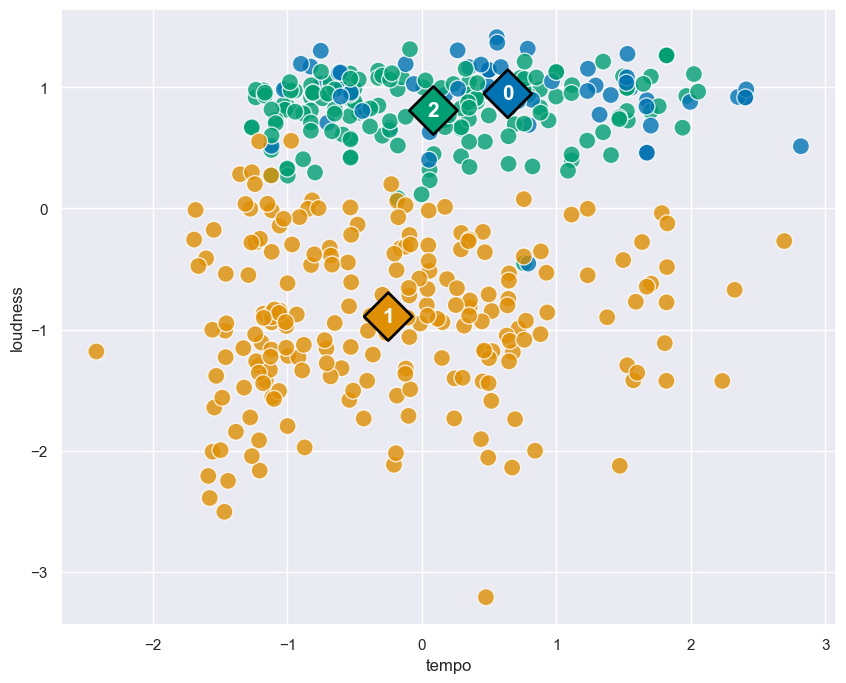

In [76]:
#set figure size
plt.figure(figsize=(10,8))

#plot the clusters
ax=sns.scatterplot(data=songs_scaled,
                  x='tempo',
                  y='loudness',
                  hue=km.labels_,
                  palette='colorblind',
                  alpha=0.8,
                  s=150,
                  legend=False)

#plot the centroids
ax=sns.scatterplot(data=cluster_centers,
                  x='tempo',
                  y='loudness',
                  hue=cluster_centers.index,
                  palette='colorblind',
                  s=600,
                  marker='D',
                  ec='black',
                  legend=False)

#add centroids Labels
for i in range(len(cluster_centers)):
               plt.text(x=cluster_centers.tempo[i],
                        y=cluster_centers.loudness[i],
                       s=i,
                       horizontalalignment='center',
                       verticalalignment='center',
                       size=15,
                       weight='bold',
                       color='white')

In [9]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [10]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [11]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [12]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [13]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [14]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [15]:
ax=sns.scatterplot(data=customers,
              x= 'valence',
              y= 'type',
              s=100)

NameError: name 'sns' is not defined

In [16]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'loudness',
              s=100)

NameError: name 'sns' is not defined

In [17]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [18]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [19]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [20]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [21]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [22]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [23]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [24]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [25]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [26]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [27]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [28]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [29]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [30]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [31]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [32]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [33]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [34]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [35]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [36]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [37]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [38]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [39]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [40]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [41]:
ax=sns.scatterplot(data=customers,
              x= 'liveness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [42]:
ax=sns.scatterplot(data=customers,
              x= 'liveness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [43]:
ax=sns.scatterplot(data=customers,
              x= 'valence',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined